The idea is to train a NN which can reweight events from a distribution such that they belong to a different distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
N = 1_000_000
m = 21

In [3]:
nice = (np.random.random(size=N) >= 0.5)

In [4]:
nn_p = np.random.choice(np.linspace(0.5, 2, m), size=N)
true_p = (nice * 1) + (~nice * nn_p)

In [5]:
x = np.random.normal(scale=true_p, loc=true_p)

/home/esel/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


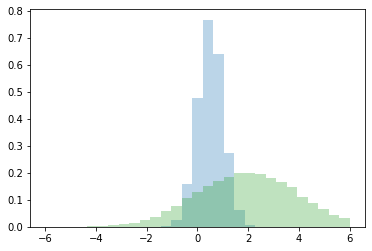

In [6]:
min_idx = (true_p == true_p.min())
zero_idx = (true_p == 0)
max_idx = (true_p == true_p.max())

bins = np.linspace(-6, 6, 30)
plt.hist(x[min_idx], alpha=0.3, bins=bins, density=True)
plt.hist(x[zero_idx], alpha=0.3, bins=bins, density=True)
plt.hist(x[max_idx], alpha=0.3, bins=bins, density=True)
None

In [7]:
df = pd.DataFrame(dict(p=nn_p, truth=true_p, x=x, nice=nice, bad=~nice))
df

p  truth         x   nice    bad
0       0.875  1.000  1.390847   True  False
1       0.650  1.000 -0.384101   True  False
2       1.475  1.000  2.080496   True  False
3       1.625  1.625  5.167215  False   True
4       1.925  1.000  1.120410   True  False
...       ...    ...       ...    ...    ...
999995  1.025  1.025  2.292854  False   True
999996  1.775  1.000  1.423975   True  False
999997  1.175  1.000  1.715984   True  False
999998  0.875  0.875 -0.716620  False   True
999999  1.400  1.400 -1.680546  False   True

[1000000 rows x 5 columns]

In [8]:
def model():
    m = keras.Sequential()
    m.add(Dense(20, input_shape=(2,), activation='relu'))
    m.add(Dense(10, activation='relu'))
    m.add(Dense(2, activation='softmax'))
    return m

In [9]:
sgd = SGD(lr=0.010)
m = model()
m.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = m.fit(df[['x', 'p']], df[['nice', 'bad']], epochs=50, batch_size=512, validation_split=0.3)

Train on 700000 samples, validate on 300000 samples
Epoch 1/50
700000/700000 [==============================] - 8s 11us/step - loss: 0.6833 - accuracy: 0.5593 - val_loss: 0.6781 - val_accuracy: 0.5702
Epoch 2/50
700000/700000 [==============================] - 6s 9us/step - loss: 0.6767 - accuracy: 0.5690 - val_loss: 0.6744 - val_accuracy: 0.5711
Epoch 3/50
700000/700000 [==============================] - 5s 8us/step - loss: 0.6735 - accuracy: 0.5694 - val_loss: 0.6714 - val_accuracy: 0.5704
Epoch 4/50
700000/700000 [==============================] - 7s 10us/step - loss: 0.6706 - accuracy: 0.5700 - val_loss: 0.6687 - val_accuracy: 0.5719
Epoch 5/50
700000/700000 [==============================] - 7s 10us/step - loss: 0.6683 - accuracy: 0.5706 - val_loss: 0.6664 - val_accuracy: 0.5732
Epoch 6/50
700000/700000 [==============================] - 7s 10us/step - loss: 0.6660 - accuracy: 0.5762 - val_loss: 0.6643 - val_accuracy: 0.5812
Epoch 7/50
700000/700000 [==============================

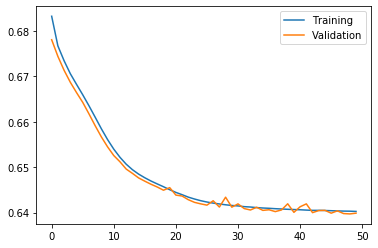

In [10]:
plt.plot(history.epoch, history.history['loss'], label="Training")
plt.plot(history.epoch, history.history['val_loss'], label="Validation")
plt.legend()

In [11]:
d = 1.3
df_orig = pd.DataFrame(dict(x=np.random.normal(loc=1, size=N), p=d))

P = m.predict(df_orig)

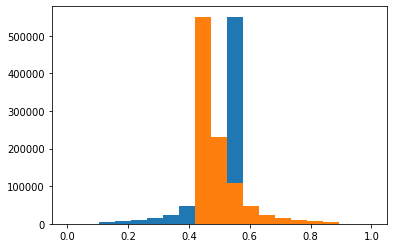

In [12]:
b = np.linspace(0, 1, 20)
plt.hist(P[:,0], bins=b)
plt.hist(P[:,1], bins=b)
None

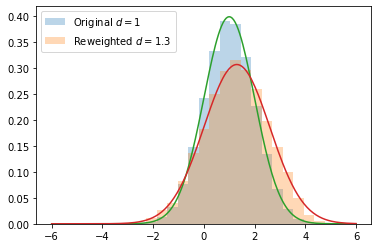

In [13]:
r = P[:,1] / P[:,0]

plt.hist(df_orig.x, bins=bins, alpha=0.3, density=True, label="Original $d=1$")
plt.hist(df_orig.x, bins=bins, weights=r, alpha=0.3, density=True, label=f"Reweighted $d={d}$")

g = np.linspace(-6, 6, 200)
plt.plot(g, np.exp(-0.5 * (g-1)**2) / np.sqrt(2 * np.pi))
plt.plot(g, np.exp(-0.5 * (g-d)**2 / d**2) / np.sqrt(2 * np.pi) / d)
plt.legend()
None

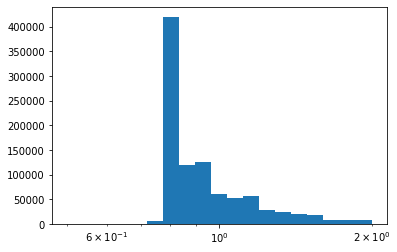

In [14]:
plt.hist(r, bins=np.logspace(-0.3, 0.3, 20))
plt.xscale('log')
None